In [170]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

Aggregate the tornado data over the following states into a monthly count of tornadoes:

- Illinois
- Indiana
- Wisconsin
- Michigan
- Missouri
- Iowa
- Minnesota

In [171]:
df_tor = pd.read_csv('https://www.spc.noaa.gov/wcm/data/1950-2021_actual_tornadoes.csv')

In [172]:
df_tor

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.80,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.00,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.10,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.10,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.00,37,1,1,1,101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67553,620523,2021,9,8,2021-09-08,15:32:00,3,PA,42,0,...,0.73,30,1,1,1,109,0,0,0,0
67554,620524,2021,9,8,2021-09-08,15:35:00,3,PA,42,0,...,1.45,30,1,1,1,109,0,0,0,0
67555,620525,2021,9,8,2021-09-08,19:08:00,3,FL,12,0,...,1.45,50,1,1,1,129,0,0,0,0
67556,620526,2021,9,9,2021-09-09,02:10:00,3,CT,9,0,...,0.75,75,1,1,1,13,0,0,0,0


In [173]:
df_tor.date = pd.to_datetime(df_tor.date)

In [174]:
drop_indices = []
for i in range(0, len(df_tor.st), 1):
    if (df_tor.st[i] == 'IL') or (df_tor.st[i] == 'IN') or\
       (df_tor.st[i] == 'WI') or (df_tor.st[i] == 'MI') or\
       (df_tor.st[i] == 'MO') or (df_tor.st[i] == 'IA') or\
       (df_tor.st[i] == 'MN'):
        continue
    else:
        drop_indices.append(i)

In [175]:
df_tor = df_tor.drop(labels=drop_indices, axis=0)
df_tor

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
6,198,1950,12,2,1950-12-02,15:00:00,3,IL,17,7,...,18.80,50,1,1,1,119,117,0,0,0
7,199,1950,12,2,1950-12-02,16:00:00,3,IL,17,8,...,18.00,200,1,1,1,119,5,0,0,0
9,201,1950,12,2,1950-12-02,17:30:00,3,IL,17,9,...,9.60,50,1,1,1,157,0,0,0,0
11,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,2.30,300,1,1,1,93,0,0,0,0
12,6,1950,1,25,1950-01-25,21:00:00,3,IL,17,3,...,0.10,100,1,1,1,91,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67533,620531,2021,9,17,2021-09-17,02:08:00,3,MN,27,0,...,0.81,75,1,1,1,37,0,0,0,0
67534,620532,2021,9,17,2021-09-17,02:08:00,3,MN,27,0,...,1.02,50,1,1,1,37,0,0,0,0
67536,620534,2021,9,20,2021-09-20,15:47:00,3,MN,27,0,...,5.66,100,1,1,1,109,0,0,0,0
67537,620535,2021,9,20,2021-09-20,16:56:00,3,WI,55,0,...,8.49,100,1,1,1,121,0,0,0,0


In [176]:
df_tor.reset_index(drop=True, inplace=True)

In [177]:
df_tor

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,198,1950,12,2,1950-12-02,15:00:00,3,IL,17,7,...,18.80,50,1,1,1,119,117,0,0,0
1,199,1950,12,2,1950-12-02,16:00:00,3,IL,17,8,...,18.00,200,1,1,1,119,5,0,0,0
2,201,1950,12,2,1950-12-02,17:30:00,3,IL,17,9,...,9.60,50,1,1,1,157,0,0,0,0
3,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,2.30,300,1,1,1,93,0,0,0,0
4,6,1950,1,25,1950-01-25,21:00:00,3,IL,17,3,...,0.10,100,1,1,1,91,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13981,620531,2021,9,17,2021-09-17,02:08:00,3,MN,27,0,...,0.81,75,1,1,1,37,0,0,0,0
13982,620532,2021,9,17,2021-09-17,02:08:00,3,MN,27,0,...,1.02,50,1,1,1,37,0,0,0,0
13983,620534,2021,9,20,2021-09-20,15:47:00,3,MN,27,0,...,5.66,100,1,1,1,109,0,0,0,0
13984,620535,2021,9,20,2021-09-20,16:56:00,3,WI,55,0,...,8.49,100,1,1,1,121,0,0,0,0


In [178]:
temp_list = []
for i in range(0, len(df_tor.yr), 1):
    a = str(df_tor.yr[i])
    b = str(df_tor.mo[i])
    temp = a+b
    temp_list.append(temp)

df_tor['YM'] = temp_list

In [179]:
df_tor

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,wid,ns,sn,sg,f1,f2,f3,f4,fc,YM
0,198,1950,12,2,1950-12-02,15:00:00,3,IL,17,7,...,50,1,1,1,119,117,0,0,0,195012
1,199,1950,12,2,1950-12-02,16:00:00,3,IL,17,8,...,200,1,1,1,119,5,0,0,0,195012
2,201,1950,12,2,1950-12-02,17:30:00,3,IL,17,9,...,50,1,1,1,157,0,0,0,0,195012
3,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,300,1,1,1,93,0,0,0,0,19501
4,6,1950,1,25,1950-01-25,21:00:00,3,IL,17,3,...,100,1,1,1,91,0,0,0,0,19501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13981,620531,2021,9,17,2021-09-17,02:08:00,3,MN,27,0,...,75,1,1,1,37,0,0,0,0,20219
13982,620532,2021,9,17,2021-09-17,02:08:00,3,MN,27,0,...,50,1,1,1,37,0,0,0,0,20219
13983,620534,2021,9,20,2021-09-20,15:47:00,3,MN,27,0,...,100,1,1,1,109,0,0,0,0,20219
13984,620535,2021,9,20,2021-09-20,16:56:00,3,WI,55,0,...,100,1,1,1,121,0,0,0,0,20219


In [180]:
dates = pd.date_range(start='1950-01', end='2021-09', freq='MS')
dates

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', length=861, freq='MS')

In [181]:
values = []
for i in range(0, len(dates), 1):
    a = str(dates.year[i])
    b = str(dates.month[i])
    values.append(a+b)

In [182]:
month_sums = []
for i in range(0, len(values), 1):
    try:
        x = values[i]
        y = df_tor['YM'].value_counts()[x]
        month_sums.append(y)
    except:
        month_sums.append(0)

In [183]:
monthly_tor = pd.DataFrame()

In [184]:
monthly_tor['Month'] = dates
monthly_tor['Tornadoes'] = month_sums
monthly_tor = monthly_tor.set_index('Month')

In [185]:
#df_tor.groupby(by='date.month').agg('count')
#df_tor_group = df_tor.groupby('date.month')
#df_tor.groupby('YM').count()

In [186]:
monthly_tor

,Tornadoes
Month,
1950-01-01,4
1950-02-01,0
1950-03-01,1
1950-04-01,0
1950-05-01,2
...,...
2021-05-01,29
2021-06-01,48
2021-07-01,61


# Problem 2

Merge this monthly tornado dataset with the ENSO, MJO, NAO, and AO dataframe created in Module 4 Notebook 1.

In [187]:
# First, bring in dataframes from Module 4

enso = pd.read_csv('https://www.esrl.noaa.gov/psd/data/correlation/censo.data',delim_whitespace=True,header=None,skiprows=1,skipfooter=2, engine='python')
pdo = pd.read_csv('https://www.esrl.noaa.gov/psd/data/correlation/pdo.data',delim_whitespace=True,header=None,skiprows=1,skipfooter=14, engine='python')
nao = pd.read_csv('https://www.esrl.noaa.gov/psd/data/correlation/nao.data',delim_whitespace=True,header=None,skiprows=1,skipfooter=3, engine='python')
ao = pd.read_csv('https://www.esrl.noaa.gov/psd/data/correlation/ao.data',delim_whitespace=True,header=None,skiprows=1,skipfooter=3, engine='python')

In [188]:
enso_new=pd.DataFrame()
nao_new=pd.DataFrame()
pdo_new=pd.DataFrame()
ao_new=pd.DataFrame()

enso_new['Date'] = pd.date_range(start=pd.datetime(1948,1,1),end=pd.datetime(2022,12,1),freq="MS")
nao_new['Date'] = pd.date_range(start=pd.datetime(1948,1,1),end=pd.datetime(2022,12,1),freq="MS")
pdo_new['Date'] = pd.date_range(start=pd.datetime(1948,1,1),end=pd.datetime(2022,12,1),freq="MS")
ao_new['Date'] = pd.date_range(start=pd.datetime(1950,1,1),end=pd.datetime(2022,12,1),freq="MS")

enso_new = enso_new.set_index('Date')
nao_new = nao_new.set_index('Date')
pdo_new = pdo_new.set_index('Date')
ao_new = ao_new.set_index('Date')

enso_new['ENSO']=enso.loc[:,1:].stack().values
nao_new['NAO']=nao.loc[:,1:].stack().values
pdo_new['PDO']=pdo.loc[:,1:].stack().values
ao_new['AO']=ao.loc[:,1:].stack().values

climate_data = pd.merge(enso_new,nao_new, left_index=True, right_index=True)
climate_data = pd.merge(climate_data,pdo_new, left_index=True, right_index=True)
climate_data = pd.merge(climate_data,ao_new, left_index=True, right_index=True)

climate_data['ENSO'][climate_data['ENSO'] <= -9.9] = np.nan
climate_data['NAO'][climate_data['NAO'] <= -99.9] = np.nan
climate_data['PDO'][climate_data['PDO'] <= -9.9] = np.nan
climate_data['AO'][climate_data['AO'] <= -99.9] = np.nan

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [189]:
climate_data

,ENSO,NAO,PDO,AO
Date,,,,
1950-01-01,-0.74,0.56,-2.13,-0.060
1950-02-01,-1.70,0.01,-2.91,0.627
1950-03-01,-1.43,-0.78,-1.13,-0.008
1950-04-01,-1.29,0.65,-1.20,0.555
1950-05-01,-1.22,-0.50,-2.23,0.072
...,...,...,...,...
2022-08-01,-1.52,1.76,NaN,-0.180
2022-09-01,-1.87,-1.42,NaN,-0.661
2022-10-01,-1.78,-0.27,NaN,1.352


In [190]:
drop_dates = pd.date_range(start='2021-10-01', end='2022-12-01', freq='MS')
drop_dates

DatetimeIndex(['2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [191]:
climate_data = climate_data.drop(labels=drop_dates)
climate_data

,ENSO,NAO,PDO,AO
Date,,,,
1950-01-01,-0.74,0.56,-2.13,-0.060
1950-02-01,-1.70,0.01,-2.91,0.627
1950-03-01,-1.43,-0.78,-1.13,-0.008
1950-04-01,-1.29,0.65,-1.20,0.555
1950-05-01,-1.22,-0.50,-2.23,0.072
...,...,...,...,...
2021-05-01,-0.45,-1.10,-0.94,-0.161
2021-06-01,-0.25,1.08,-1.18,0.840
2021-07-01,-1.05,0.06,-1.87,0.625


In [192]:
df = pd.merge(climate_data,monthly_tor, left_index=True, right_index=True)

In [193]:
df

,ENSO,NAO,PDO,AO,Tornadoes
Date,,,,,
1950-01-01,-0.74,0.56,-2.13,-0.060,4
1950-02-01,-1.70,0.01,-2.91,0.627,0
1950-03-01,-1.43,-0.78,-1.13,-0.008,1
1950-04-01,-1.29,0.65,-1.20,0.555,0
1950-05-01,-1.22,-0.50,-2.23,0.072,2
...,...,...,...,...,...
2021-05-01,-0.45,-1.10,-0.94,-0.161,29
2021-06-01,-0.25,1.08,-1.18,0.840,48
2021-07-01,-1.05,0.06,-1.87,0.625,61


# Problem 3

Create a random forest regression model and use features that include the 4 climate indices to predict the monthly number of tornadoes. Create a scatter plot of the predicted and observed number of tornadoes over these states. Report the correlation coefficient and RMSE of your model.

In [194]:
x = df.drop('Tornadoes', axis=1)
y = df['Tornadoes']

In [195]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.20)

In [196]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(xtrain, ytrain)

RandomForestRegressor()

In [197]:
ypredict = forest.predict(xtest)

In [198]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

R2 = r2_score(ytest, ypredict)
print(f'The correlation coefficient of the model is {R2}')
RMSE = (mean_squared_error(ytest, ypredict))**0.5
print(f'The RMSE of the model is {RMSE}')

The correlation coefficient of the model is -0.08508914439818649
The RMSE of the model is 24.37263363939628


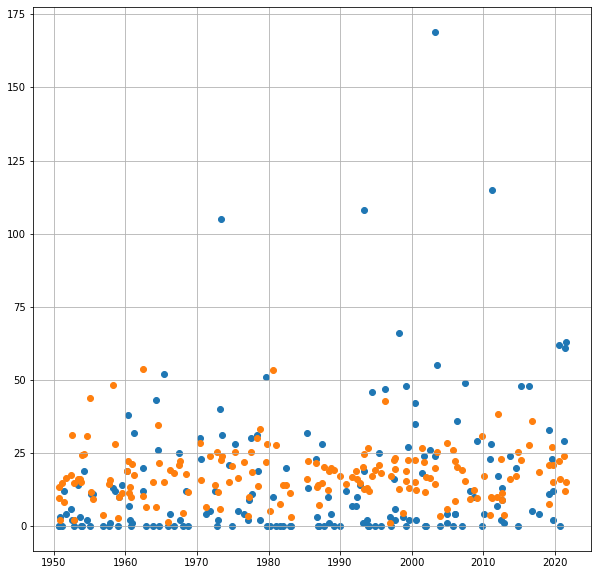

In [199]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot
plt.scatter(ytest.index, ytest, color='tab:blue')
plt.scatter(ytest.index, ypredict, color='tab:orange')
plt.grid()

In [200]:
# fig = plt.figure(figsize=(7, 7))
# ax = fig.add_subplot

# x_ax = range(len(ytest))
# plt.plot(x_ax, ytest, linewidth=1, label="original")
# plt.plot(x_ax, ypredict, linewidth=1.1, label="predicted")
# plt.title("y-test and y-predicted data")
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.legend(loc='best',fancybox=True, shadow=True)
# plt.grid(True)
# plt.show() 

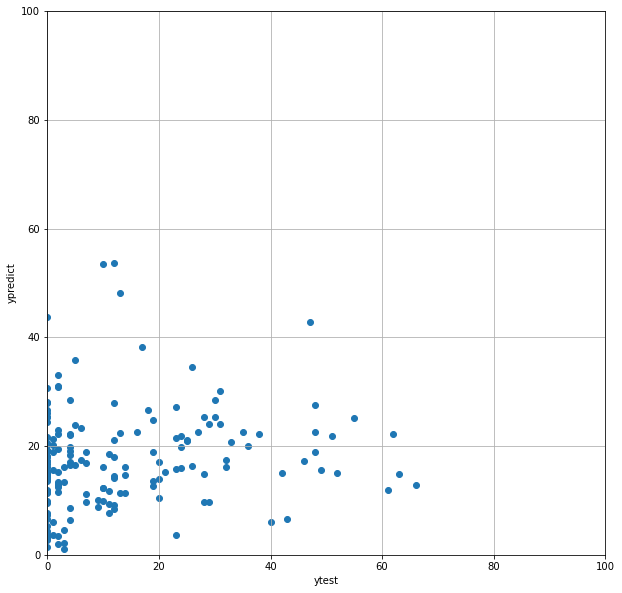

In [201]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot
plt.scatter(ytest, ypredict, color='tab:blue')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel('ytest')
plt.ylabel('ypredict')
plt.grid()

# Problem 4

Create a one-hot encoding for the month of the year. Repeat the scatterplot and compare the RMSE and correlation coefficient values.

In [202]:
months = []
for i in range(0, len(df), 1):
    months.append(df.index.month[i])
df['Month']=months

In [203]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['Month']])

transformed.shape

(861, 12)

In [204]:
month_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
df_enc = pd.DataFrame(transformed.toarray(), columns=month_list)
df_enc['Month'] = df.index
df_enc = df_enc.set_index('Month')

In [205]:
df_hot = pd.concat([df, df_enc], axis=1)
df_hot.drop(['Month'], inplace=True, axis=1)
df_hot

,ENSO,NAO,PDO,AO,Tornadoes,1,2,3,4,5,6,7,8,9,10,11,12
1950-01-01,-0.74,0.56,-2.13,-0.060,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950-02-01,-1.70,0.01,-2.91,0.627,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950-03-01,-1.43,-0.78,-1.13,-0.008,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950-04-01,-1.29,0.65,-1.20,0.555,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950-05-01,-1.22,-0.50,-2.23,0.072,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,-0.45,-1.10,-0.94,-0.161,29,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-01,-0.25,1.08,-1.18,0.840,48,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-01,-1.05,0.06,-1.87,0.625,61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2021-08-01,-0.73,-0.49,-1.12,-0.217,63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Repeat the analysis from above...

In [206]:
x = df_hot.drop('Tornadoes', axis=1)
y = df_hot['Tornadoes']

In [207]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.20, random_state=2)

In [208]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(xtrain, ytrain)

RandomForestRegressor()

In [209]:
ypredict = forest.predict(xtest)

In [210]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

R2 = r2_score(ytest, ypredict)
print(f'The correlation coefficient of the model is {R2}')
RMSE = (mean_squared_error(ytest, ypredict))**0.5
print(f'The RMSE of the model is {RMSE}')

The correlation coefficient of the model is 0.2699255841455942
The RMSE of the model is 18.47078186376959


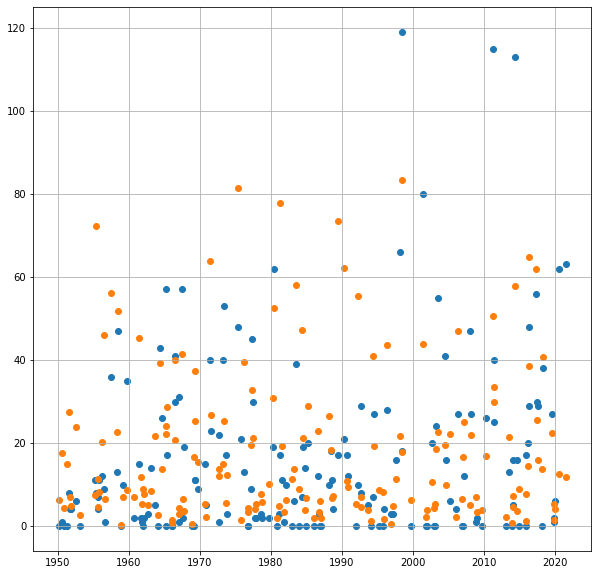

In [211]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot
plt.scatter(ytest.index, ytest, color='tab:blue')
plt.scatter(ytest.index, ypredict, color='tab:orange')
plt.grid()

In [212]:
# fig = plt.figure(figsize=(7, 7))
# ax = fig.add_subplot

# x_ax = range(len(ytest))
# plt.plot(x_ax, ytest, linewidth=1, label="original")
# plt.plot(x_ax, ypredict, linewidth=1.1, label="predicted")
# plt.title("y-test and y-predicted data")
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.legend(loc='best',fancybox=True, shadow=True)
# plt.grid(True)
# plt.show() 

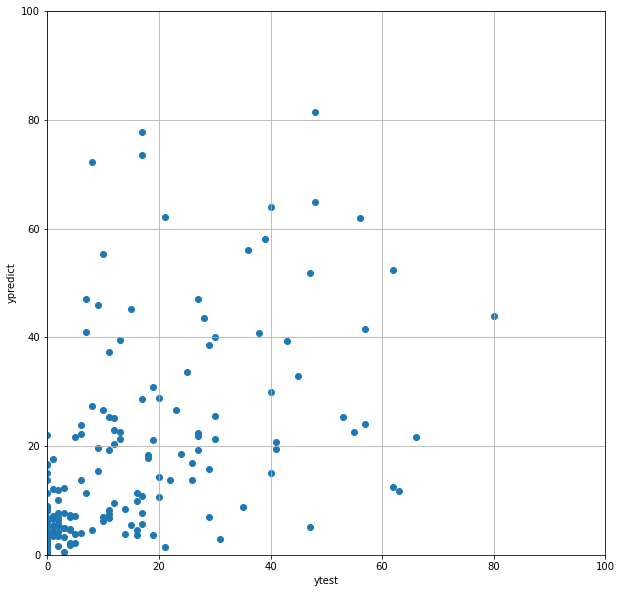

In [213]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot
plt.scatter(ytest, ypredict, color='tab:blue')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel('ytest')
plt.ylabel('ypredict')
plt.grid()

# Problem 5

Perform a feature importance and multipass permutation analysis of your features.

### Feature Importance

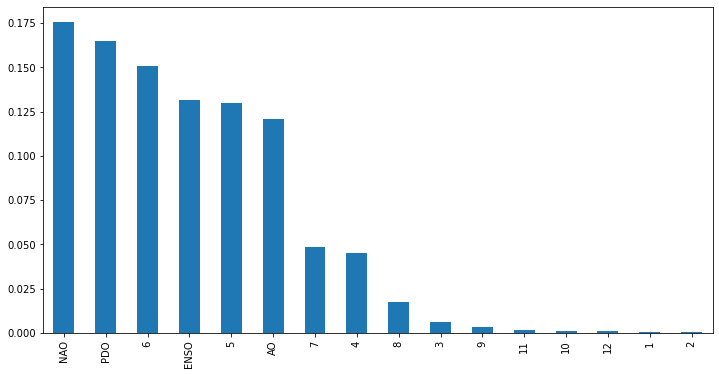

In [120]:
importances = pd.Series(forest.feature_importances_)

importances.index = df_hot.drop('Tornadoes', axis=1).columns
importances.sort_values(inplace=True, ascending=False)
importances.plot.bar(figsize=(12,6))
plt.show()

### Multipass Permutation

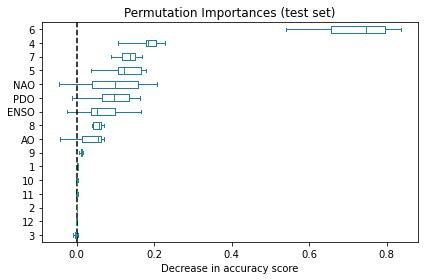

In [121]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    forest, xtest, ytest, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=x.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# Problem 6

Create a SHAP Summary Plot showing feature importance and feature effects.

In [122]:
import shap

# print the JS visualization code to the notebook
shap.initjs()

In [123]:
explainer = shap.Explainer(forest)
shap_test = explainer(xtest)
shap_values = explainer.shap_values(x)

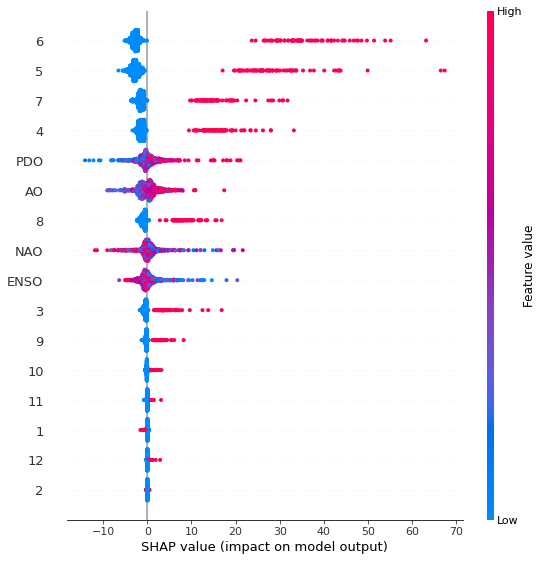

In [124]:
shap.summary_plot(shap_values, x)

# Problem 7

Create a SHAP Feature Dependence for the ENSO index.

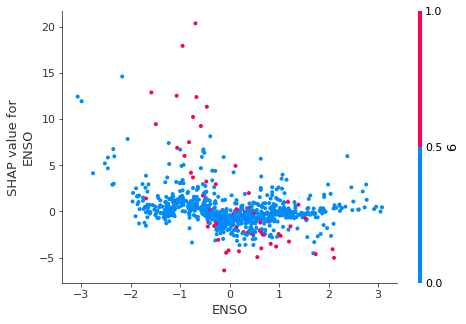

In [125]:
shap.dependence_plot('ENSO', shap_values, x)

# Problem 8

Any observations on the importance of the various features in your model from the XAI techniques you tried?

While the feature importance test highlighted the various climate indices, both 
the multipass permutation test and the SHAP tests highlighted a handful of 
months as the most important, followed by the climate indices. In general, 
months 4-8 tend to be ranked highly in by both these methods. Looking at the 
total number of tornadoes in each month, we can see a correlation:

<BarContainer object of 12 artists>

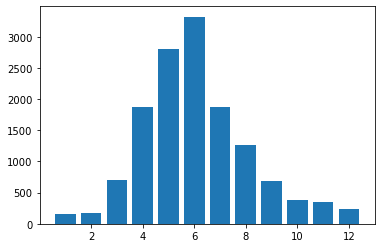

In [194]:
temp_list = []
for i in range(0, len(df_hot.index), 1):
    temp_list.append(df_hot.index.month[i])

df_hot_1 = df_hot
df_hot_1['Month'] = temp_list

monthly_sums = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(0, len(df_hot_1), 1):
    for m in range(0, 12, 1):
        if df_hot_1.Month[i]==m+1:
            monthly_sums[m]=monthly_sums[m]+df_hot_1.Tornadoes[i]

month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.bar(month, monthly_sums)

Months viewed as most important by the model are those which see the highest 
number of tornado occurences (April-August). With all three techniques, it is 
June (6) that is ranked the highest among the months (sometimes the highest in 
general) and, as we see, June is the month that sees the most tornadoes. Thus, 
it seems that the model finds it's greatest accuracy from checking whether a 
given month is the same as that month that climatologically receives the most 
tornadoes.

Among the climate indices, there is little consensus as to which are the most
important to the model, though they all seem to offer some amount of skill 
(ranking more highly than the low tornado months). It may be prudent to follow 
up these analyses with a test of whether this model performs better or worse 
than simply using climatological means. That could give a bettter idea of how 
much skill these indices actually add to the model.

# Bonus Plots

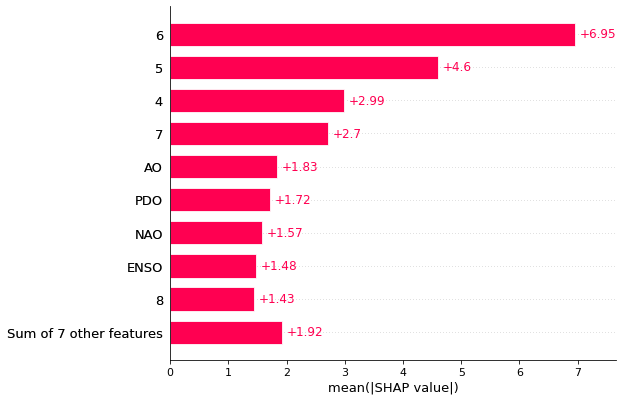

In [203]:
shap.plots.bar(shap_test)

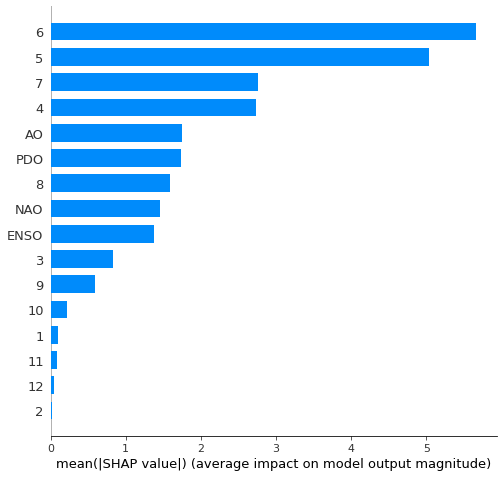

In [238]:
shap.summary_plot(shap_values, features=x.columns, plot_type='bar')

In [222]:
shap.plots.force(explainer.expected_value, shap_values, features=x.columns)

In [229]:
# shap.plots.force(shap_test[100])

In [235]:
shap.plots.force(explainer.expected_value, shap_values[792, :], features=x.columns)

In [234]:
x.iloc[[792]]

,ENSO,NAO,PDO,AO,1,2,3,4,5,6,7,8,9,10,11,12
2016-01-01,2.96,-0.37,1.53,-1.449,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
xtest[['ENSO']].idxmax()

ENSO   2016-01-01
dtype: datetime64[ns]